# Filters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
x, rate = librosa.load('despacito.mp3')

print('Shape: ', x.shape)
print('Sampling rate (hz): ', rate)
print('Samples / time: ', 435712/19)

Audio(x, rate=rate)

Shape:  (467448,)
Sampling rate (hz):  22050
Samples / time:  22932.21052631579


In [ ]:
x_fft_raw = np.fft.fft(x)

N = x_fft_raw.shape[0]

print('N: ', N)
print('dtype: ', x_fft_raw.dtype)

N:  467448
dtype:  complex128


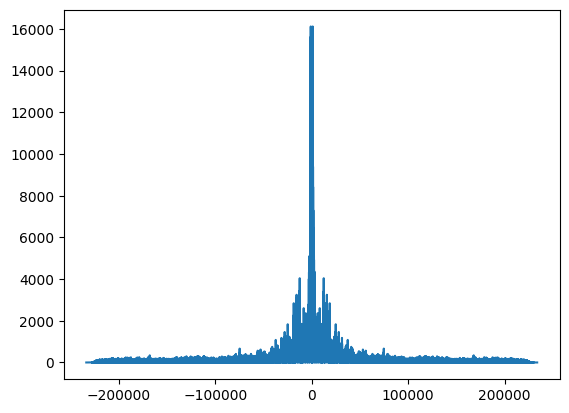

In [ ]:
x_fft = np.fft.fftshift(x_fft_raw)

x_fft_amp = np.abs(x_fft)
x_fft_phase = np.angle(x_fft)

t_shifted = np.arange(N)-N//2

plt.plot(t_shifted, np.abs(x_fft_amp))
plt.show()

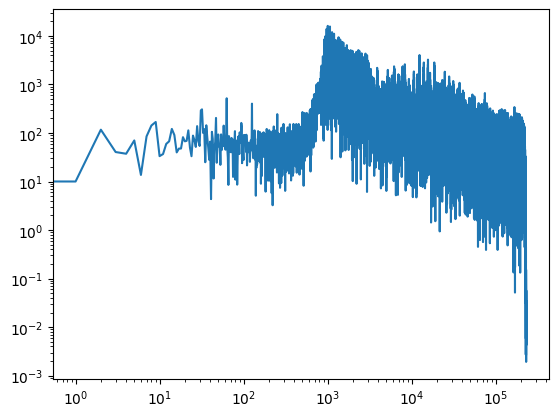

In [ ]:
plt.yscale('log')
plt.xscale('log')

plt.plot(np.abs(x_fft_raw[0:N//2]))
plt.show()

N_stft: 256


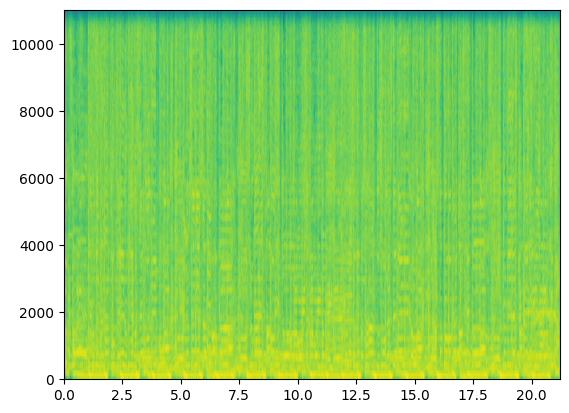

In [ ]:
'''
Spectrogram: Time vs Frequency
'''

N_stft = 2**8
print(f'N_stft: {N_stft}')
plt.specgram(x,Fs=rate, NFFT=N_stft, noverlap=0, scale = 'dB'); plt.show()

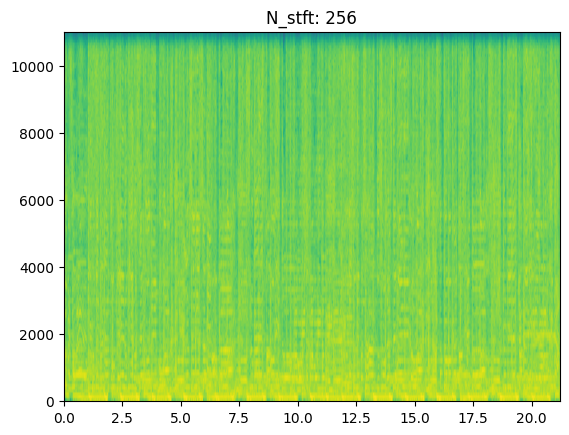

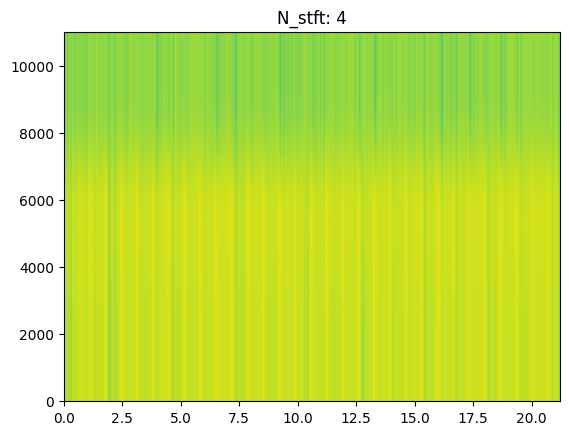

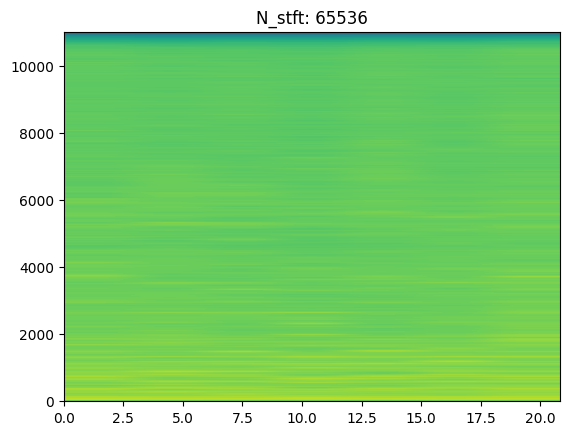

In [ ]:
'''
Spectrogram: Time vs Frequency
'''

N_stft = 2**8
plt.title(f'N_stft: {N_stft}')
plt.specgram(x,Fs=rate, NFFT=N_stft, noverlap=0, scale = 'dB'); plt.show()

N_stft = 2**2
plt.title(f'N_stft: {N_stft}')
plt.specgram(x,Fs=rate, NFFT=N_stft, noverlap=0, scale = 'dB'); plt.show()

N_stft = 2**16
plt.title(f'N_stft: {N_stft}')
plt.specgram(x,Fs=rate, NFFT=N_stft, noverlap=0, scale = 'dB'); plt.show()

## Hamming Window

h[n] =  [0.25   0.1733 0.0493 0.006  0.0493 0.1733 0.25  ]


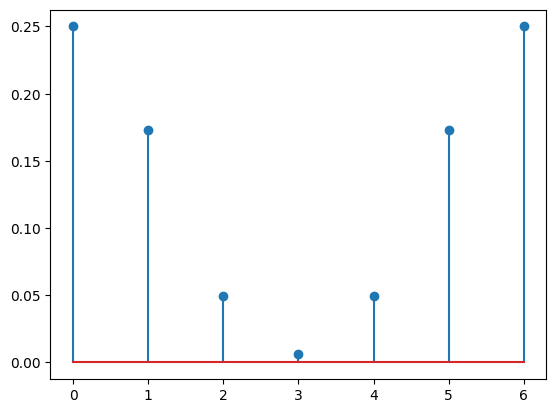

In [ ]:
window_width = 7

'''
Impulse response h[n]
'''

co_eff = [0.25, 0.1733, 0.0493, 0.006, 0.0493, 0.1733, 0.25]

h = np.array(co_eff)

print('h[n] = ', h.astype(np.float16))
plt.stem(h); plt.show()

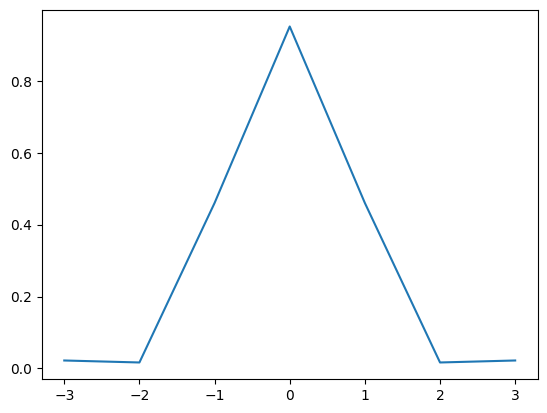

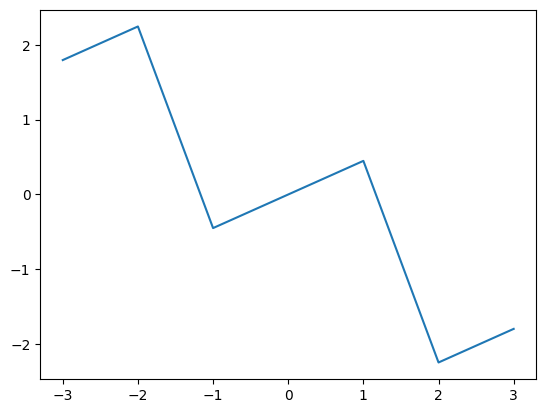

In [ ]:
'''
Plot the characteristics of N = 7
'''

h_fft_raw = np.fft.fft(h)
h_fft = np.fft.fftshift(h_fft_raw)

amp = np.abs(h_fft)
phase = np.angle(h_fft)

t2_shifted = np.arange(window_width)-window_width//2
plt.yscale('linear'); plt.xscale('linear')

plt.plot(t2_shifted,amp); plt.show()
plt.plot(t2_shifted,phase); plt.show()

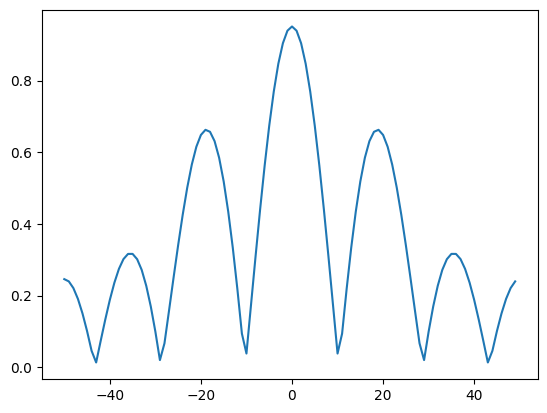

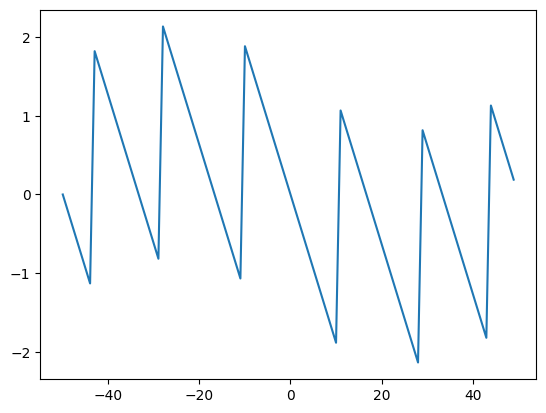

In [ ]:
'''
Make it finer: Pad with zeros for more samples (N=100)
'''

N_h = 100
h_pad = np.pad(h, (0, N_h-window_width), 'constant', constant_values=(0, 0))

h_pad_fft_raw = np.fft.fft(h_pad)
h_pad_fft = np.fft.fftshift(h_pad_fft_raw)

amp_pad = np.abs(h_pad_fft)
phase_pad = np.angle(h_pad_fft)

t3_shifted = np.arange(N_h) - N_h//2
plt.yscale('linear'); plt.xscale('linear')

plt.plot(t3_shifted,amp_pad); plt.show()
plt.plot(t3_shifted,phase_pad); plt.show()

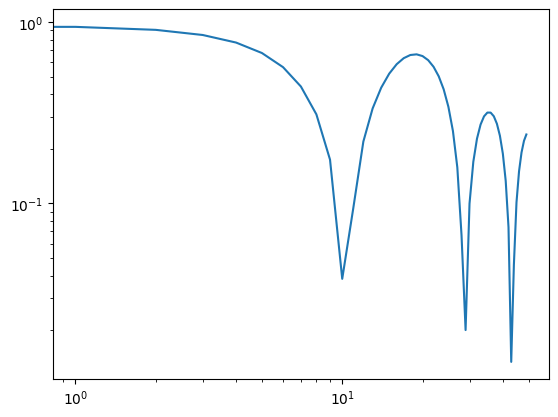

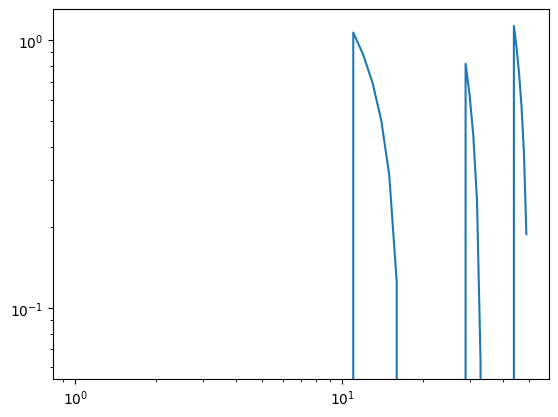

In [ ]:
'''
Plot in Log-log scale
'''

amp_raw_2 = np.abs(h_pad_fft_raw[0:N_h//2])
phase_raw_2 = np.angle(h_pad_fft_raw[0:N_h//2])

plt.yscale('log'); plt.xscale('log')
plt.plot(amp_raw_2); plt.show()

plt.yscale('log'); plt.xscale('log')
plt.plot(phase_raw_2); plt.show()

In [ ]:
'''
Apply the filter
'''
x_ham = np.convolve(h,x)

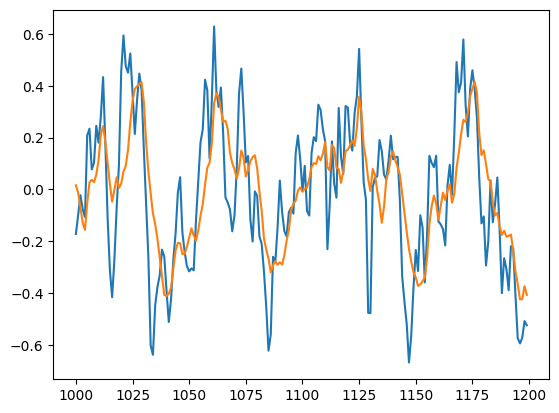

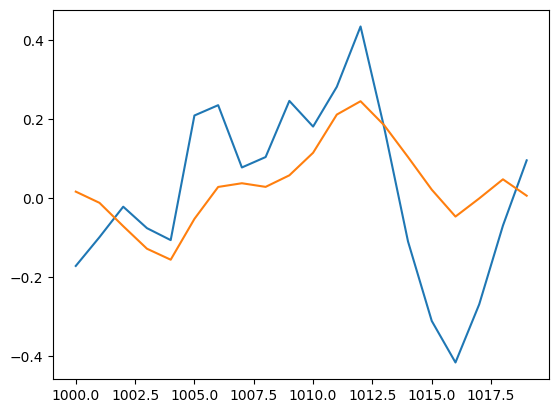

In [ ]:
'''
Time domain effect
'''
start = 1000
width = 200
t = np.arange(width)+start

plt.plot(t, x[start:start+width])
plt.plot(t, x_ham[start:start+width])
plt.show()

start = 1000
width = 20
t = np.arange(width)+start
plt.plot(t, x[start:start+width])
plt.plot(t, x_ham[start:start+width])
plt.show()

In [ ]:
'''
Original audio
'''
Audio(x, rate=rate)

In [ ]:
'''
Hamming window filter of N=7 applied
'''
Audio(x_ham, rate=rate)

## Image Filtering

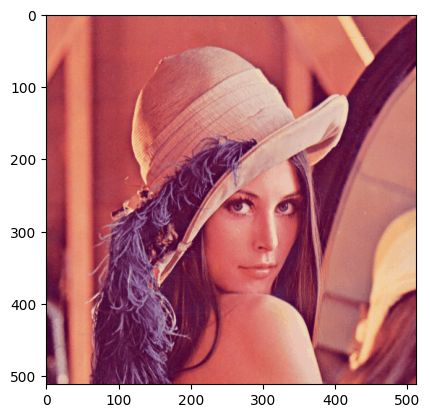

In [ ]:
from PIL import Image
import numpy as np
import scipy.fftpack as fp
import matplotlib.pyplot as plt

image = Image.open('lena.jpg')
plt.imshow(image)
plt.show()

In [ ]:
## Functions to go from image to frequency-image and back
fft_2d = lambda data: fp.rfft(fp.rfft(data, axis=0),axis=1)
ifft_2d = lambda f: fp.irfft(fp.irfft(f, axis=1),axis=0)

## Helper functions to rescale a frequency-image to [0, 255] and save
remmax = lambda x: x/x.max()
remmin = lambda x: x - np.amin(x, axis=(0,1), keepdims=True)
touint8 = lambda x: (remmax(remmin(x))*(256-1e-4)).astype(int)

In [ ]:
'''
2D FFT
'''
freq = fp.rfft(fp.rfft(image, axis=0),axis=1)

freq

array([[ 3.20701980e+07, -2.58263844e+05,  4.73073802e+05, ...,
        -2.84791116e+04, -2.70518437e+04, -1.82280000e+04],
       [-7.03353102e+05,  3.13431121e+05, -1.61610568e+05, ...,
        -1.30313140e+04,  7.80845716e+03,  2.60916472e+04],
       [ 1.22448767e+06, -3.05770866e+05, -8.69182683e+04, ...,
         1.63039023e+04,  2.07974960e+03, -1.48752880e+04],
       ...,
       [ 4.00328784e+04,  4.04279774e+04,  1.84667178e+04, ...,
        -1.24814776e+04,  1.75584035e+04, -1.53857250e+04],
       [ 1.18850807e+04, -5.76896853e+03,  1.34255337e+04, ...,
         2.59416644e+03, -2.16364624e+04, -2.40668874e+04],
       [ 3.49080000e+04,  6.31022356e+03,  1.23555781e+03, ...,
         2.53304710e+04, -2.98227644e+04, -4.95580000e+04]])

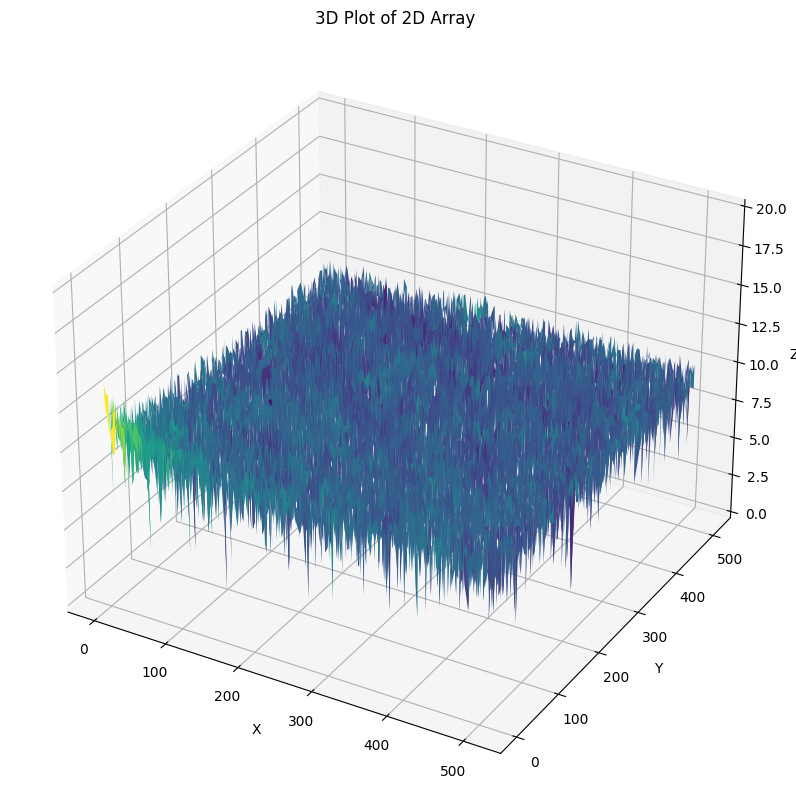

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

data = np.log(freq)
x = np.arange(0, data.shape[0])
y = np.arange(0, data.shape[1])
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Flatten the data array and use it as the Z values
z = data.flatten()

# Plot the data
ax.plot_surface(x, y, data, cmap='viridis')

ax.set_zlim(0, 20)

# You can also customize the plot with labels and titles
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of 2D Array')

plt.show()

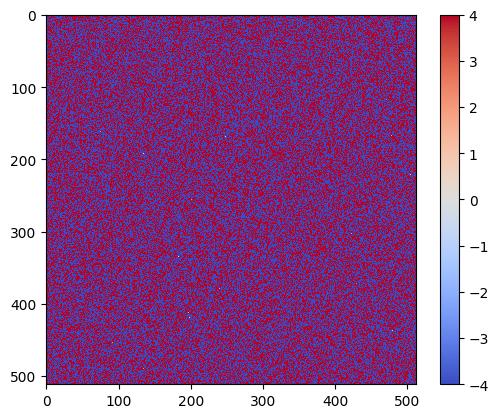

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.imshow(freq, cmap='coolwarm', interpolation='nearest', vmin=-4, vmax=4)
plt.colorbar()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_frequency_spectrum(data):

    # Shift zero frequency component to the center
    fft_data_shifted = np.fft.fftshift(data)

    # Calculate the magnitude spectrum (absolute value)
    magnitude_spectrum = np.abs(fft_data_shifted)

    # Plot the magnitude spectrum as a heatmap
    plt.imshow(np.log(1 + magnitude_spectrum), cmap='viridis', aspect='auto')
    plt.colorbar(label='Magnitude (log scale)')
    plt.title('2D Frequency Spectrum')
    plt.xlabel('Frequency (x-direction)')
    plt.ylabel('Frequency (y-direction)')
    plt.show()

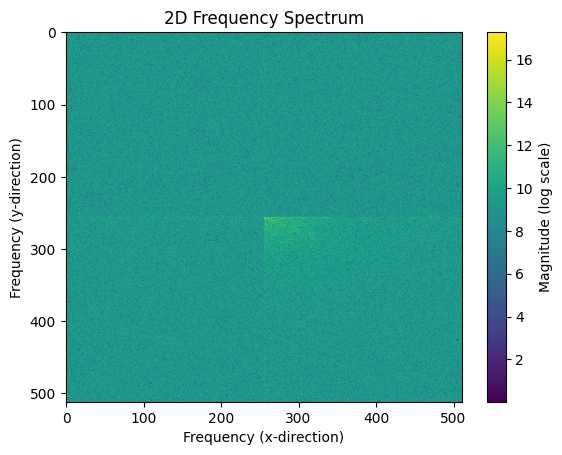

In [ ]:
plot_2d_frequency_spectrum(freq)

In [ ]:
'''
Low Pass Filter
'''
mask = np.array(Image.open('lp.jpg')).astype(float) / 255
mask.shape

(512, 512, 3)

In [ ]:
lpf = mask[:, :, 0]
lpf.shape

(512, 512)

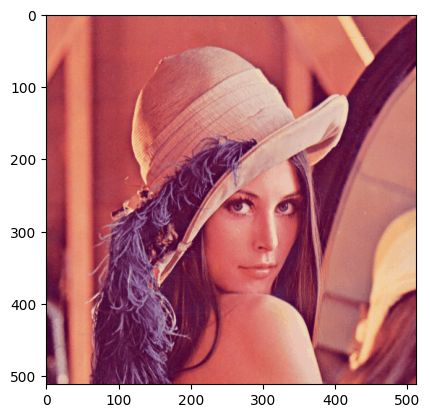

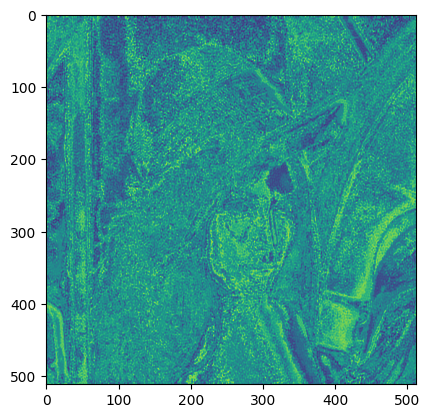

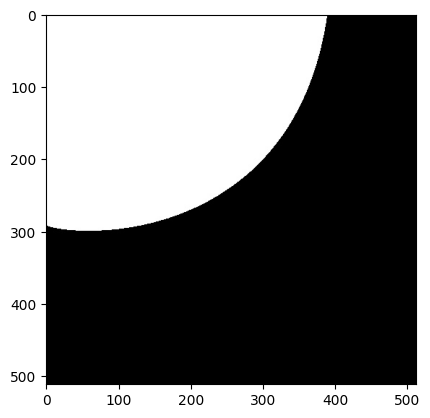

In [ ]:
filtered_image = touint8(ifft_2d(freq * lpf))

plt.imshow(image); plt.show()
plt.imshow(filtered_image); plt.show()
plt.imshow(mask); plt.show()

In [ ]:
'''
High Pass Filter
'''
mask = np.array(Image.open('hp.jpg')).astype(float) / 255
mask.shape
hpf = mask[:, :, 0]
hpf.shape

(512, 512)

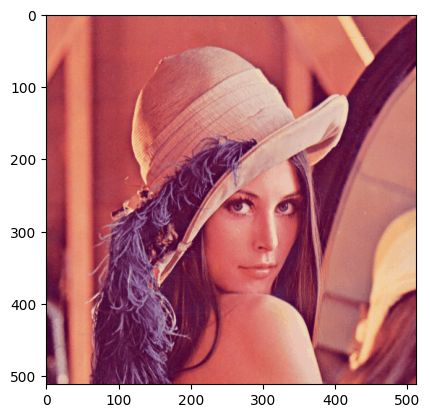

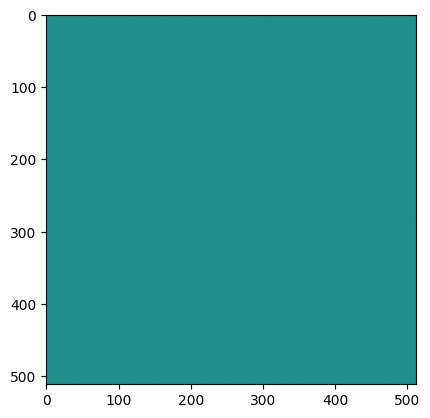

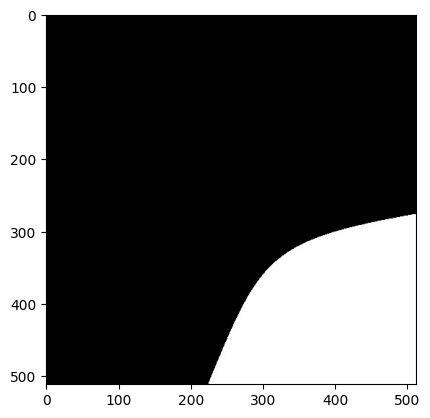

In [ ]:
filtered_image = touint8(ifft_2d(freq * hpf))

plt.imshow(image); plt.show()
plt.imshow(filtered_image); plt.show()
plt.imshow(mask); plt.show()

In [ ]:
'''
Band Pass Filter
'''
mask = np.array(Image.open('bp.jpg')).astype(float) / 255
mask.shape
bpf = mask[:, :, 0]
bpf.shape

(512, 512)

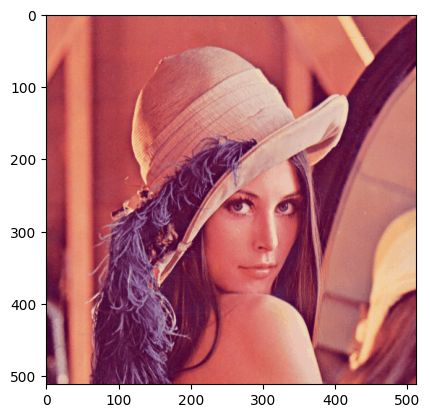

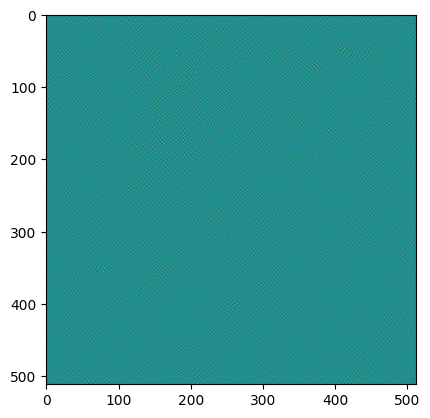

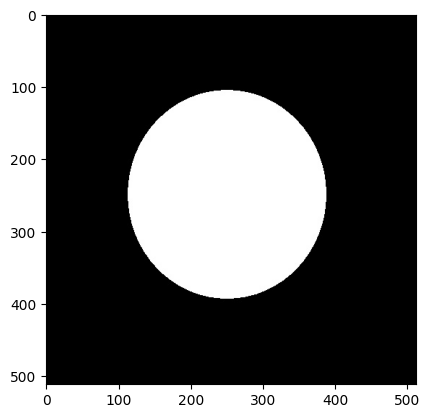

In [ ]:
filtered_image = touint8(ifft_2d(freq * bpf))

plt.imshow(image); plt.show()
plt.imshow(filtered_image); plt.show()
plt.imshow(mask); plt.show()